In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
space = pd.read_csv('/Users/ianwood/Downloads/outer_space_objects.csv')

In [3]:
space

,Entity,Code,Year,num_objects
0,APSCO,NaN,2023,1
1,Algeria,DZA,2002,1
2,Algeria,DZA,2010,1
3,Algeria,DZA,2016,3
4,Algeria,DZA,2017,1
...,...,...,...,...
1170,World,OWID_WRL,2020,1274
1171,World,OWID_WRL,2021,1813
1172,World,OWID_WRL,2022,2478
1173,World,OWID_WRL,2023,2664


In [28]:
#Groups the dataframe by the column 'Entity' 
#Finds the row(s) with the smallest Year for each group,
#Retrieves the corresponding row indicies using get_level_vales(1)
#Uses 'iloc' to fetch the rows from the original dataframe
space2 = space.iloc[space.groupby('Entity')['Year'].nsmallest(1).index.get_level_values(1)]

#Resets the index and then removes the previous index
space2 = space2.reset_index()
space2 = space2.drop('index', axis=1)

space2.dtypes

Entity         object
Code           object
Year            int64
num_objects     int64
dtype: object

##### The table below highlights the earliest instances of entities launching objects into space, revealing several unexpected findings. Notably, Italy and Canada emerged among the top five earliest countries to achieve this milestone—an outcome that challenges conventional expectations, as one might anticipate China to feature prominently in the early stages of space exploration given its current leadership in the field.

##### Furthermore, it is particularly striking to observe that Intelsat (International Telecommunications Satellite Organisation) launched a space object prior to the ESA (European Space Agency). This discrepancy underscores how international collaborations, like Intelsat, were able to establish a presence in space exploration ahead of more formalized and region-specific institutions such as the ESA.

In [142]:
pd.set_option('display.max_rows', 500)
space3 = space2.sort_values(by='Year')
space3 = space3.drop(108)

print(space3)

                    Entity Code  Year  num_objects
81                  Russia  RUS  1957            2
104          United States  USA  1958            7
103         United Kingdom  GBR  1962            1
16                  Canada  CAN  1962            1
47                   Italy  ITA  1964            2
33                  France  FRA  1965            3
42                Intelsat  NaN  1965            1
6                Australia  AUS  1967            1
29   European Space Agency  NaN  1968            5
34                 Germany  DEU  1969            1
48                   Japan  JPN  1970            1
64                    NATO  NaN  1970            1
18                   China  CHN  1970            1
90                   Spain  ESP  1974            1
66             Netherlands  NLD  1974            1
39                   India  IND  1975            1
40               Indonesia  IDN  1976            1
41                Inmarsat  NaN  1976            3
21                 Czechia  CZE

#### Analysing the years with the largest increases in space object launches reveals significant trends tied to key developments in the space industry. The early years were primarily characterised by exploration and scientific discovery, as nations sought to understand the potential applications of space. However, with the advent of commercialisation, the frequency of launches has surged dramatically in recent years. This shift reflects the growing involvement of private sector players, advancements in technology, and a broadening of space applications—from satellite communications to emerging industries such as space tourism and resource exploration. The data highlights a clear transition from a state-led, exploratory phase to a dynamic, commercially-driven era of space activity

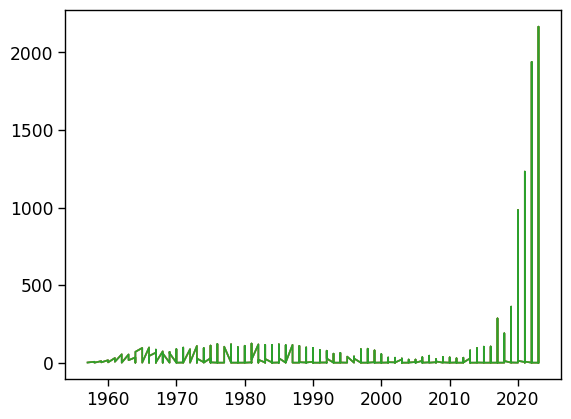

In [154]:
space = space.loc[~space['Entity'].str.contains('World')]
space = space.sort_values(by='Year')

for entity in space:
    if entity != 'Year':
        plt.plot(space.Year, space.num_objects)

#### As someone born in Colombia, I was particularly interested in analyzing the development of Colombia's space program in comparison to the rest of South America. Notably, Brazil emerged as the region's pioneer in space exploration, which was surprising given Argentina's significant economic growth during that period. Additionally, it was intriguing to observe a marked increase in the establishment and advancement of South American space programs during the late 2000s and early 2010s, signaling a regional shift toward greater investment in space technology and exploration.

/Users/ianwood/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x400 with 0 Axes>

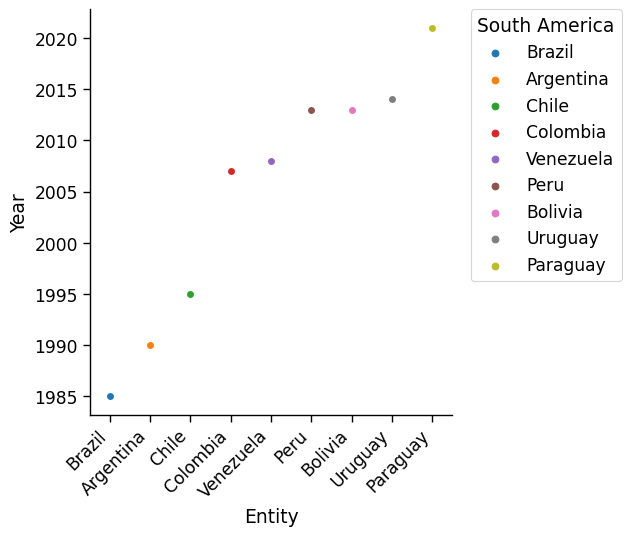

In [135]:
space_sa = space2.iloc[[105, 106, 74, 73, 19, 17, 14, 13, 4]]


space_sa = space_sa.sort_values(by='Year')

plt.figure(figsize=(8,4))

sns.catplot(x="Entity", y="Year", data=space_sa, hue="Entity")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='South America')

plt.xticks(rotation = 45, ha='right')

plt.show()